**1.	Quais os 4 pilares ACID? Explique cada um deles com exemplos;**

O conceito ACID surgiu para trazer mais segurança em aplicações que suportam grande volume de usuários e transações, uma vez que estas transações podem ocorrer de forma concorrente e precisam de diretrizes/pilares para que o banco de dados não seja comprometido por anomalias. Os quatro pilares se dividem em:

**Atomicidade**: Ou a transação será executada em sua totalidade ou não será executada. Como exemplos temos transações diárias do tipo PIX que, caso não sejam executadas de forma plena, são descartadas, obrigando o usuário a refazê-la

**Consistência**: A transação retorna um novo estado de dados e, caso ela não seja efetivada, retorna os dados em seu estado anterior, antes da transação. Como exemplo temos sistemas de segurança de jogos online que procuram anomalias em transações servidor-jogadores e fazem o rollback do banco de dados caso elas aconteçam. Desta forma evita-se abusos/cheats que podem ser corrigidos com o rollback

**isolamento**: Uma transação é isolada enquanto está em andamento, não sendo interferida por nenhuma outra. Ainda no exemplo do PIX, a transação de um usuário para outro é isolada de modo que outras concorrentes não alterem o montante/dados que estão sendo transferidos.

**Durabilidade**: As transações efetivadas precisam ser registradas mesmo que o servidor passe por falhas como queda de energia, travamentos ou erros. Como exemplo temos servidores que precisam estar íntegros mesmo quando sujeitos a ataques DDOS ou quando alocados em locais em que o fornecimento de energia não é consistente.

Considere a tabela abaixo para os próximos exercícios:

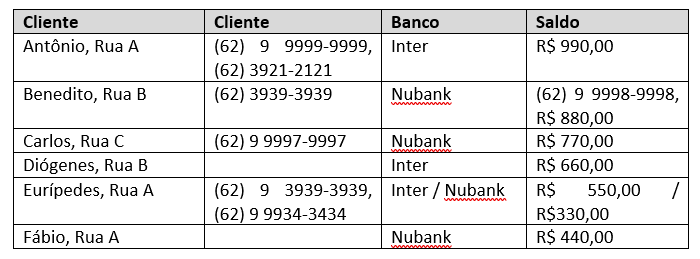

**2.	Quais fundamentos da 1st normal form são violados na tabela apresentada?**

Para chegar à primeira forma normal devemos: 

**Determinar o atributo que possui característica de chave primária, tornar todos atributos atômicos**: As colunas da tabela precisam apresentar nomes diferentes de modo que a primeira coluna cliente tenha os nomes extraídos e vinculados a uma chave primária.  Na coluna Banco também podem ser atribuídas chaves.  A segunda coluna cliente pode ser dividida em duas novas colunas, telefone e celular para que não haja o acúmulo de duas naturezas de dados em apenas uma linha. O mesmo ocorre na coluna saldo onde o montante alocado está inserido junto com o telefone do cliente e linhas alocam o saldo de dois bancos.  

**Transformar o grupo repetitivo em uma nova tabela, levando a chave primária da tabela na qual estava, para manter a ligação entre a tabela criada e a original**:  A partir do momento em que a chave cliente e banco são criadas, novas tabelas podem ser criadas de modo que elas se comuniquem através das chaves.

**3.	Converta a tabela para a 1st normal form;**

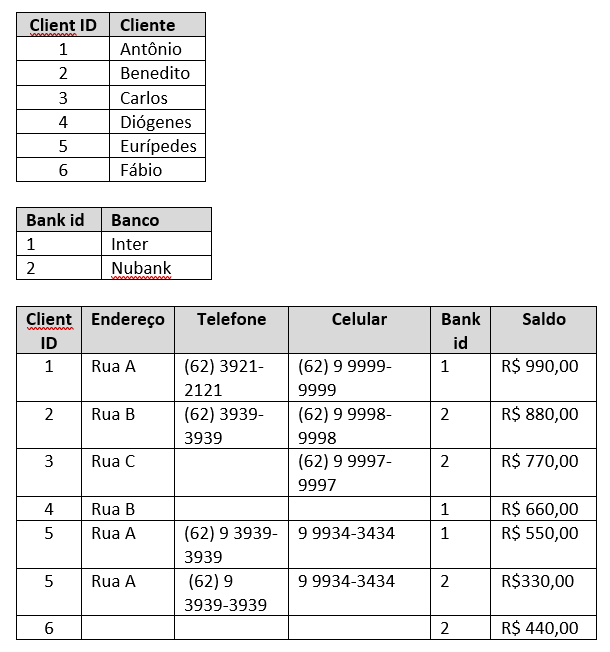

**4.	Converta a tabela para a 2nd normal form;**

Podemos dizer que uma tabela se encontra na segunda Forma Normal **se está na primeira forma normal e não possui dependências parciais da chave primária**. Sendo assim, para a tabela de saldo, as colunas Cliente, Endereço, Telefone e Celular podem ser removidas e inseridas nas tabelas cliente.

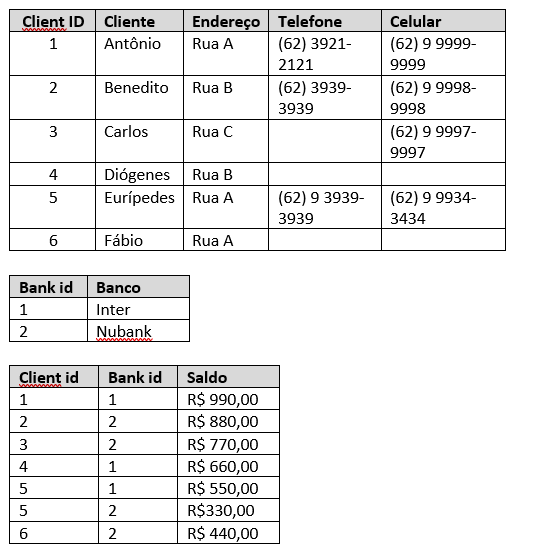

**5.	Converta a tabela para a 3rd normal form;**

Podemos dizer que uma tabela se encontra na Terceira Forma Normal se **está na segunda forma normal e se nenhum dos campos foram determinados transitivamente pela chave primária**.

Como nenhum dos campos “não chave” não possuem dependência com outro campo “não chave” as tabelas já se encontram na terceira forma. Caso uma coluna seja criada, como "operadora do celular" na tabela cliente, por exemplo, haveria dependência entre campos “não chave” (operadora -> telefone) e uma nova tabela poderia ser proposta.

O diagrama abaixo demonstra a arquitetura do software Herokeeper. Utilize o diagrama para as próximas questões:

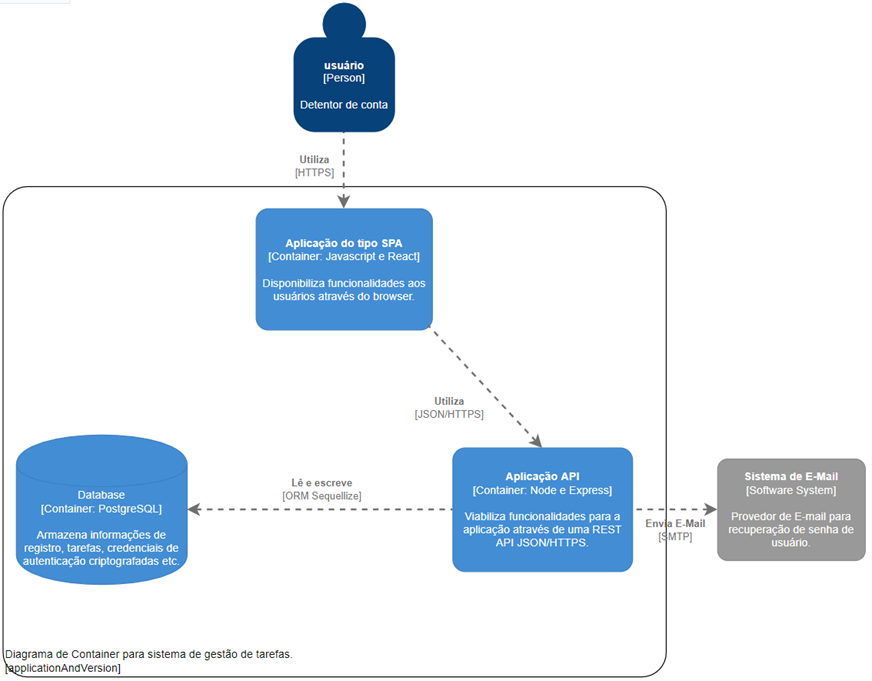
 
**6.	Suponhamos que ao invés de um banco de dados PostgreSQL, nós utilizássemos planilhas de excel para armazenar os dados da aplicação. Quais possíveis anomalias poderiam surgir dessa arquitetura?**

A comunicação entre as tabelas seria comprometida, uma vez que a atualização de uma tabela cliente, por exemplo, pode levar à inserção de novos parâmetros à tabela tarefas. Caso esta atualização não seja em conjunto o banco de dados pode apresentar inconsistências, um dos pilares do ACID. 

A durabilidade também pode ser comprometida, uma vez que não se pode garantir a integridade de transações efetivadas diante de quedas de energia, conexão, etc.

**7.	Se a aplicação tivesse 1 milhão de usuários simultâneos, quais possíveis problemas poderiam surgir nesse contexto? Como você asseguraria a melhor modelagem para o banco de dados?**

A lentidão nas consultas seria um problema recorrente, sendo assim, a normalização de segundo ou terceiro nível se torna a melhor opção uma vez que as consultas seriam feitas de forma mais eficiente, sem a necessidade de leitura de dados recorrentes que podem ser consultados via SKs.

**8.	Explique o conceito de OLTP e como ele se aplica ao Herokeeper;**

OLTP trata-se do conjunto de diretrizes de modelagem voltadas para alta velocidade na manipulação de dados operacionais, porém ineficiente para geração de análises gerenciais.

O Herokeeper utiliza-se destas ferramentas ao normalizar o banco de dados através de várias tabelas que se comunicam via SKs. Desta forma, estas tabelas, por mais que não fiquem claras para análises gerenciais, são extremamente ágeis para consulta e de fácil manutenção do banco de dados.

Exemplo: 
registro: cliente id, email, celular, endereço 
login: client id, username, password (criptografada)
tarefas: cliente id, task id, date, type (CRUD) 

**9.	O que é OLAP? Como o conceito se encaixaria na arquitetura da aplicação acima?**

OLAP trata-se do conjunto de diretrizes de modelagem voltadas para otimização de leitura e geração de análises e relatórios gerenciais. O front end do herokeeper pode ser considerado uma estrutura OLAP por apresentar, de forma clara e amigável, dados fornecidos por uma estrutura OLTP aos seus usuários. Eventualmente novos Dashboards podem ser criados para que o responsável pelo aplicativo tenha acesso a estatísticas do serviço com dados sensíveis que não podem ser apresentados ao público.
Extra:


**10.	Instale o pgAdmin e crie um banco de dados PostgreSQL. Carregue a tabela normal_forms da forma disponibilizada no arquivo CSV. A seguir, crie um novo schema e estabeleça um design da mesma tabela na 3ª forma normal. Crie uma consulta SQL que retorna todos os dados tanto na estrutural desnormalizada (original), quanto na normalizada (várias tabelas separadas). Compare a performance de ambos os métodos.**

**Projeto Python:**

In [ ]:
#2.	Para uma dada lista de números, retorne todos os valores distintos presentes na lista

lista=[1, 3, 5, 3, 7, 3, 1, 1, 5]
result=[]

print(f'valores unícos: {set(lista)}')

In [ ]:
#1.	Crie um script que itera dos inteiros 1 até 50. Para múltiplos de 3, imprima “Fizz” ao invés do número. Para múltiplos de 5, imprima “Buzz”. Para múltiplos de 3 e 5, imprima “FizzBuzz”.

lista=range(51)
result=[]
for i in lista:
    if i%3==0 and i%5==0:
        result.append(str(i) +" é FizzBuzz" )
    elif i%3==0:
        result.append(str(i) +" é Fizz")
    elif i%5==0:
        result.append(str(i) +" é Buzz")
    else:
        result.append(i)
for i in result:
    print(i)

**Projeto SQL:**

In [ ]:
import pandas as pd
from google.cloud import bigquery
import sys
import csv

if "kaggle_secrets" in sys.modules:
    from kaggle_secrets import UserSecretsClient
    UserSecretsClient().set_gcloud_credentials(project='minha-squad-minha-vida')
    
client = bigquery.Client()
dataset_ref = client.dataset("data", project="minha-squad-minha-vida")
dataset = client.get_dataset(dataset_ref)
                             
table_ref=dataset_ref.table("video_game__sales")
table = client.get_table(table_ref)
videosales= client.list_rows(table).to_dataframe()
                             
# table_ref2=dataset_ref.table("covid__global_reports")
# table2 = client.get_table(table_ref2)                        
# globalreports= client.list_rows(table2).to_dataframe()

#videosales.to_csv('videosales.csv',index=False)
#globalreports.to_csv('globalreports.csv',index=False)

query = '''
WITH sales_by_year AS(
    SELECT 
        IF (YEAR = 'N/A', '1980', YEAR) AS YEAR,
        SUM(Global_Sales) AS Global_Sales,
    FROM 
        `minha-squad-minha-vida.data.video_game__sales`
    GROUP BY 
        YEAR
    )
SELECT 
    YEAR AS Year,
    ROUND(SUM(Global_Sales) OVER (ORDER BY YEAR),2) AS Cumulative_Global_Sales
FROM
    sales_by_year
ORDER BY
    YEAR
'''
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query,job_config=safe_config)

data = query_job.to_dataframe()

                                                 
dataframe = pd.DataFrame(data)
print(dataframe.head())
#dataframe.to_csv('dataframe.csv',index=False)
table_id = "minha-squad-minha-vida.roberto.desafio_03"

job_config = bigquery.LoadJobConfig(
#     schema=[
#         bigquery.SchemaField("country_region", bigquery.enums.SqlTypeNames.STRING),
#     ],
#     write_disposition="WRITE_TRUNCATE",
)

job = client.load_table_from_dataframe(
    dataframe, table_id, job_config=job_config
)

job.result()
table = client.get_table(table_id)
print(f'{table.num_rows} linhas carregadas e {len(table.schema)} colunas para {table_id}')